In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,...,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,...,0.02,0.15,66.67%,366.67%,0.0,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,...,0.02,0.17,77.78%,522.22%,1.0,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,...,0.07,0.25,111.11%,611.11%,1.0,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,...,0.07,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         16283 non-null  object 
 1   Location ISO Code            16283 non-null  object 
 2   Location                     16283 non-null  object 
 3   New Cases                    16283 non-null  int64  
 4   New Deaths                   16283 non-null  int64  
 5   New Recovered                16283 non-null  int64  
 6   New Active Cases             16283 non-null  int64  
 7   Total Cases                  16283 non-null  int64  
 8   Total Deaths                 16283 non-null  int64  
 9   Total Recovered              16283 non-null  int64  
 10  Total Active Cases           16283 non-null  int64  
 11  Location Level               16283 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

### Cleaning Data

In [4]:
df_copy = df.copy()

In [5]:
df_clean = df_copy.drop(columns=['City or Regency', 'Name', 'Item', 'Kind', 'Hidden', 'Special Status'])

In [6]:
df_clean = df_clean.drop(columns=['Location ISO Code', 'Country', 'Continent', 'Location Level', 'Time Zone', 'Total Regencies', 'Total Cities', 'Total Districts', 'Total Rural Villages', 'Total Urban Villages', 'Area (km2)', 'Population Density', 'Longitude', 'Latitude'])

In [7]:
df_clean = df_clean.drop(columns=['New Cases per Million', 'Total Cases per Million', 'New Deaths per Million', 'Total Deaths per Million', 'New Active Cases', 'Total Active Cases', 'Location'])

In [8]:
df_clean = df_clean.dropna()

In [9]:
df_clean.duplicated().sum()

0

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13059 entries, 1 to 16282
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         13059 non-null  object 
 1   New Cases                    13059 non-null  int64  
 2   New Deaths                   13059 non-null  int64  
 3   New Recovered                13059 non-null  int64  
 4   Total Cases                  13059 non-null  int64  
 5   Total Deaths                 13059 non-null  int64  
 6   Total Recovered              13059 non-null  int64  
 7   Province                     13059 non-null  object 
 8   Island                       13059 non-null  object 
 9   Population                   13059 non-null  int64  
 10  Case Fatality Rate           13059 non-null  object 
 11  Case Recovered Rate          13059 non-null  object 
 12  Growth Factor of New Cases   13059 non-null  float64
 13  Growth Factor of

In [11]:
df_clean.head(10)

,Date,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Province,Island,Population,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
1,1/9/2020,0,1,23,9,6,33,Jawa Timur,Jawa,40479023,66.67%,366.67%,0.0,0.33
2,1/10/2020,0,1,14,9,7,47,Jawa Timur,Jawa,40479023,77.78%,522.22%,1.0,1.00
3,1/11/2020,0,3,8,9,10,55,Jawa Timur,Jawa,40479023,111.11%,611.11%,1.0,3.00
4,1/12/2020,0,3,1,9,13,56,Jawa Timur,Jawa,40479023,144.44%,622.22%,1.0,1.00
5,1/13/2020,0,0,0,9,13,56,Jawa Timur,Jawa,40479023,144.44%,622.22%,1.0,0.00
6,1/14/2020,0,0,0,9,13,56,Jawa Timur,Jawa,40479023,144.44%,622.22%,1.0,1.00
7,1/15/2020,0,0,0,9,13,56,Jawa Timur,Jawa,40479023,144.44%,622.22%,1.0,1.00
8,1/16/2020,0,0,0,9,13,56,Jawa Timur,Jawa,40479023,144.44%,622.22%,1.0,1.00
9,1/17/2020,0,0,4,9,13,60,Jawa Timur,Jawa,40479023,144.44%,666.67%,1.0,1.00
10,1/18/2020,0,0,8,9,13,68,Jawa Timur,Jawa,40479023,144.44%,755.56%,1.0,1.00


In [12]:
df_clean['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
time_series = df_clean.loc[(df_clean['Date'] >= '1/1/2021')].reset_index(drop=True)
time_series

,Date,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Province,Island,Population,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2021-01-01,7,0,10,8753,358,7157,Aceh,Sumatera,5247257,4.09%,81.77%,1.75,1.00
1,2021-01-01,101,1,76,17694,517,16221,Bali,Nusa Tenggara,4216171,2.92%,91.68%,0.56,0.25
2,2021-01-01,287,12,188,18441,537,15931,Banten,Jawa,10722374,2.91%,86.39%,1.06,6.00
3,2021-01-01,68,5,98,3671,117,2657,Bengkulu,Sumatera,1999539,3.19%,72.38%,0.94,2.50
4,2021-01-01,1956,20,1643,185691,3290,166453,DKI Jakarta,Jawa,10846145,1.77%,89.64%,0.97,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,2021-07-09,124,1,3,12447,252,10412,Sulawesi Tenggara,Sulawesi,2635461,2.02%,83.65%,0.92,0.50
5417,2021-07-09,278,9,9,17424,572,15525,Sulawesi Utara,Sulawesi,2641884,3.28%,89.10%,1.24,9.00
5418,2021-07-09,718,10,275,55675,1259,48840,Sumatera Barat,Sumatera,5519245,2.26%,87.72%,0.93,1.00
5419,2021-07-09,341,6,221,31147,1569,27088,Sumatera Selatan,Sumatera,8217551,5.04%,86.97%,1.15,0.38


## Perkembangan Covid Periode 2021

In [13]:
time_series.describe()

,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Population,Growth Factor of New Cases,Growth Factor of New Deaths
count,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000,5.421000e+03,5421.000000,5421.000000
mean,305.545471,7.354916,249.011253,50567.249400,1403.310828,44646.441616,8.664030e+06,1.381219,1.199292
std,791.536790,17.695138,594.478865,86075.238053,2432.940711,78144.025583,1.148721e+07,2.702802,2.208479
min,0.000000,0.000000,0.000000,1960.000000,27.000000,1206.000000,6.484070e+05,0.000000,0.000000
25%,30.000000,0.000000,21.000000,9426.000000,190.000000,7926.000000,2.635461e+06,0.710000,0.500000
50%,90.000000,2.000000,75.000000,17978.000000,547.000000,14559.000000,4.340348e+06,1.000000,1.000000
75%,227.000000,6.000000,205.000000,43981.000000,1081.000000,39717.000000,9.095591e+06,1.350000,1.110000
max,13112.000000,366.000000,15022.000000,636383.000000,13635.000000,527060.000000,4.516132e+07,120.500000,102.000000


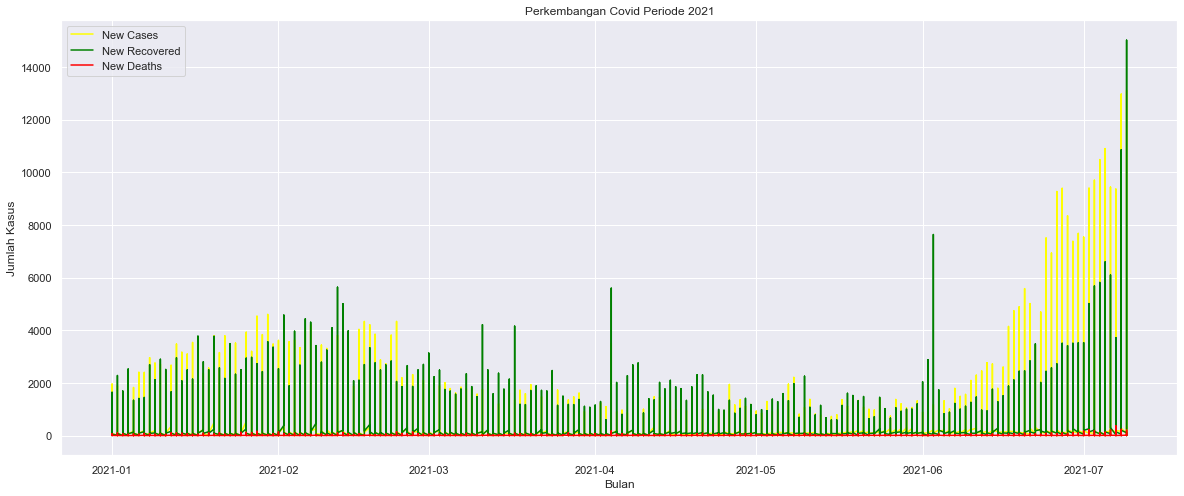

In [26]:
fig = plt.figure(figsize=(20, 8))
plt.plot(time_series['Date'], time_series['New Cases'], color='yellow', label="New Cases")
plt.plot(time_series['Date'], time_series['New Recovered'], color='green', label="New Recovered")
plt.plot(time_series['Date'], time_series['New Deaths'], color='red', label="New Deaths")
plt.title('Perkembangan Covid Periode 2021')
plt.ylabel('Jumlah Kasus')
plt.xlabel("Bulan")
plt.legend()
plt.show()

In [ ]:
fig.savefig('myFlask/templates/Perkembangan.jpg', dpi = 100)

## Perkembangan kasus Covid-19 selama masa PPKM Darurat

### Group data

In [28]:
df_group = df_clean.groupby('Island')[['Total Cases', 'Total Deaths', 'Total Recovered', 'Population']].sum()
df_group['Total Positive'] = df_group['Total Cases'] - df_group['Total Recovered'] - df_group['Total Deaths']
df_group

,Total Cases,Total Deaths,Total Recovered,Population,Total Positive
Island,,,,,
Jawa,224904760,6943502,196090902,69788216200,21870356
Kalimantan,25414397,657497,22262824,6287195919,2494076
Maluku,2312592,48175,1939662,1131368784,324755
Nusa Tenggara,12082957,359606,10199940,5675746990,1523411
Papua,5685968,72083,3697565,2078013360,1916320
Sulawesi,18933743,408101,16643036,7179528813,1882606
Sumatera,40633574,1275031,34852384,23455807333,4506159


In [16]:
df_group.to_csv('Covid-19-Indonesia.csv')

In [82]:
df_final = df_group.reset_index()
df_final

,Island,Total Cases,Total Deaths,Total Recovered,Population,Total Positive
0,Jawa,224904760,6943502,196090902,69788216200,21870356
1,Kalimantan,25414397,657497,22262824,6287195919,2494076
2,Maluku,2312592,48175,1939662,1131368784,324755
3,Nusa Tenggara,12082957,359606,10199940,5675746990,1523411
4,Papua,5685968,72083,3697565,2078013360,1916320
5,Sulawesi,18933743,408101,16643036,7179528813,1882606
6,Sumatera,40633574,1275031,34852384,23455807333,4506159


In [83]:
df_final['New Total Cases'] = df_final.apply(lambda x: round(x['Total Cases']/1000000), axis=1)
df_final['New Total Deaths'] = df_final.apply(lambda x: round(x['Total Deaths']/1000000), axis=1)
df_final['New Total Recovered'] = df_final.apply(lambda x: round(x['Total Recovered']/1000000), axis=1)
df_final = df_final.drop(['Total Cases', 'Total Deaths', 'Total Recovered'], axis=1)
df_final

,Island,Population,Total Positive,New Total Cases,New Total Deaths,New Total Recovered
0,Jawa,69788216200,21870356,225,7,196
1,Kalimantan,6287195919,2494076,25,1,22
2,Maluku,1131368784,324755,2,0,2
3,Nusa Tenggara,5675746990,1523411,12,0,10
4,Papua,2078013360,1916320,6,0,4
5,Sulawesi,7179528813,1882606,19,0,17
6,Sumatera,23455807333,4506159,41,1,35


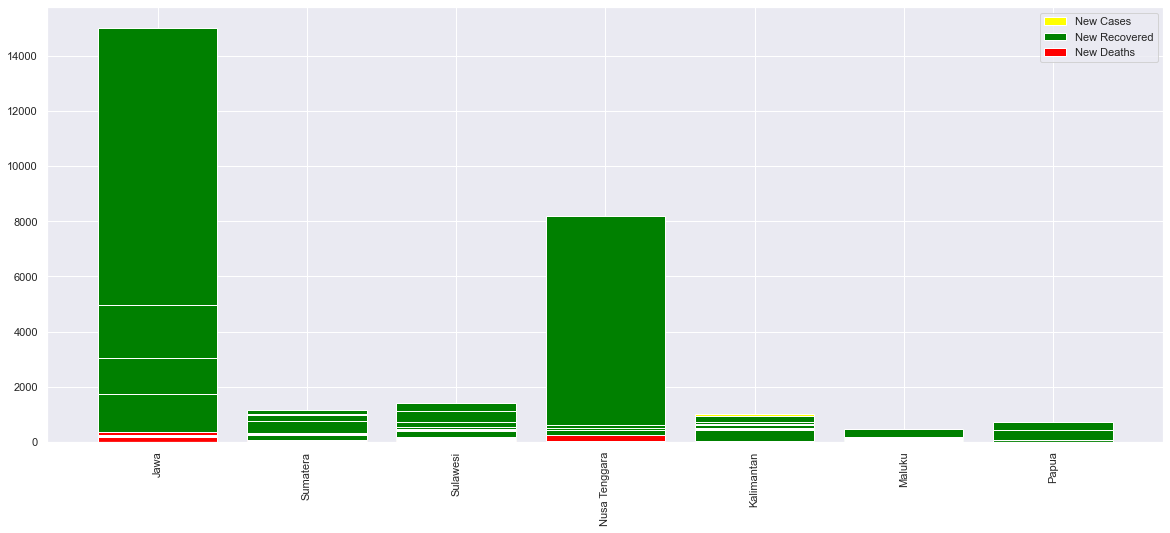

In [30]:
fig2 = plt.figure(figsize=(20, 8))
plt.bar(df_clean['Island'], df_clean['New Cases'], color='yellow', label="New Cases")
plt.bar(df_clean['Island'], df_clean['New Recovered'], color='green', label="New Recovered")
plt.bar(df_clean['Island'], df_clean['New Deaths'], color='red', label="New Deaths")
plt.xticks(rotation=90);
plt.legend()
plt.show()

In [32]:
import numpy as np

In [117]:
x = np.arange(len(df_final['Island'].unique()))
x

array([0, 1, 2, 3, 4, 5, 6])

In [52]:
lst = list(df_final['Island'].unique())
lst

['Jawa',
 'Kalimantan',
 'Maluku',
 'Nusa Tenggara',
 'Papua',
 'Sulawesi',
 'Sumatera']

In [135]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

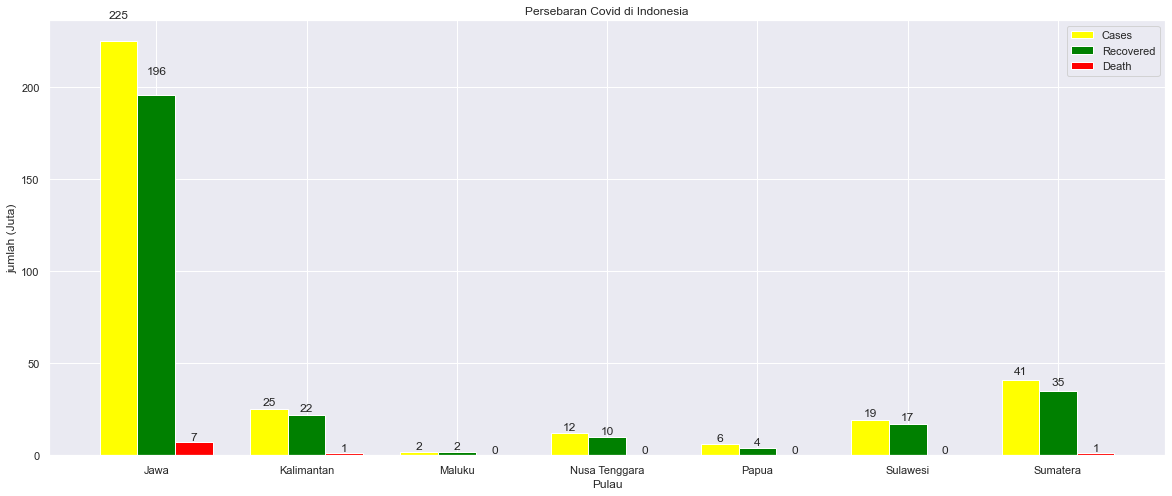

In [144]:
w=0.25
fig2, ax = plt.subplots(figsize=(20, 8))
bar1 = ax.bar(x, list(df_final['New Total Cases']), w, color='yellow', label = "Cases")

bar2 = ax.bar(x+w, list(df_final['New Total Recovered']), w, color= 'green', label = "Recovered")
bar3 = ax.bar(x+w*2, list(df_final['New Total Deaths']), w, color= 'red', label = "Death")

plt.xlabel("Pulau")
plt.ylabel("jumlah (Juta)")
plt.title("Persebaran Covid di Indonesia")
plt.xticks(x+w, lst)
plt.legend()

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
plt.show()

In [145]:
fig2.savefig('myFlask/templates/masaPPKM.jpg')